In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split


In [45]:
data_raw = pd.read_csv("german_credit_data.csv")

In [46]:
data_raw.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [47]:
data_raw.drop("Unnamed: 0",axis=1,inplace=True)

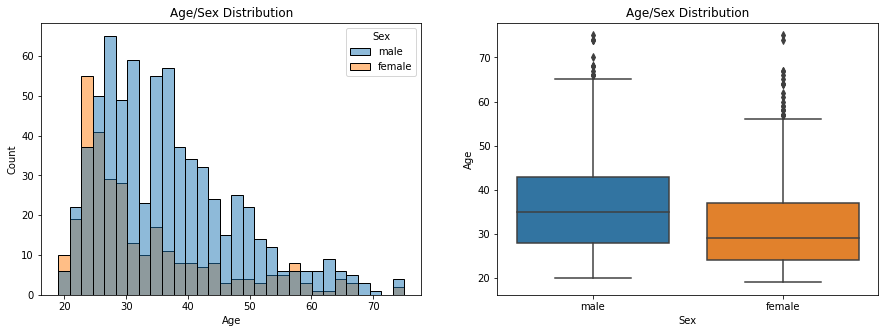

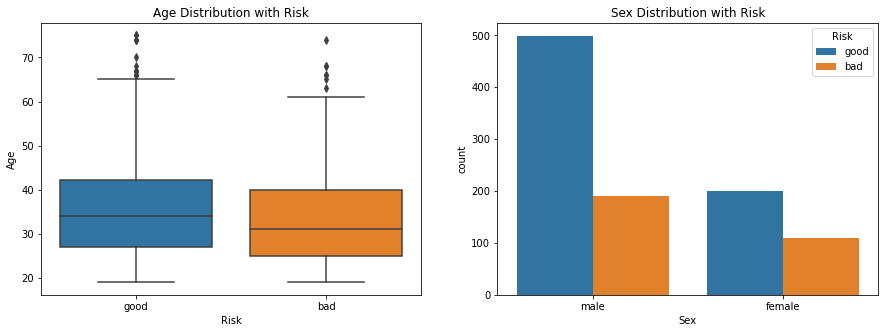

In [48]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(data_raw, x='Age', bins=30, hue="Sex", ax=ax[0]).set_title("Age/Sex Distribution");
sns.boxplot(data=data_raw, x="Sex", y="Age", ax=ax[1]).set_title("Age/Sex Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=data_raw, x='Risk', y='Age', ax=ax[0]).set_title("Age Distribution with Risk");
sns.countplot(data=data_raw, x="Sex", hue="Risk", ax=ax[1]).set_title("Sex Distribution with Risk");

In [19]:
cat_cols = ['Sex','Housing','Saving accounts','Checking account','Credit amount','Purpose','Risk']
for col in cat_cols:
    data_raw[col] = data_raw[col].astype('category')
    data_raw[col] = data_raw[col].cat.codes
    

In [23]:
data_raw.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [27]:
y=data_raw['Risk']
X = data_raw.drop('Risk',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


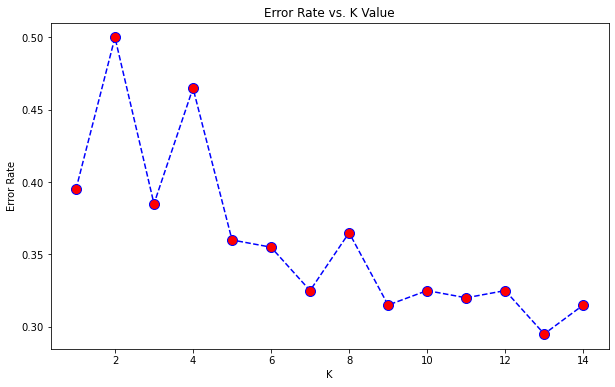

Minimum error:- 0.29500000000000004 at K = 13


In [28]:
error_rate = []
for i in range(1,15):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [31]:
knn = KNeighborsClassifier(n_neighbors=13, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)


(0.705, 0.8184615384615386)

# Decison Tree Classifier

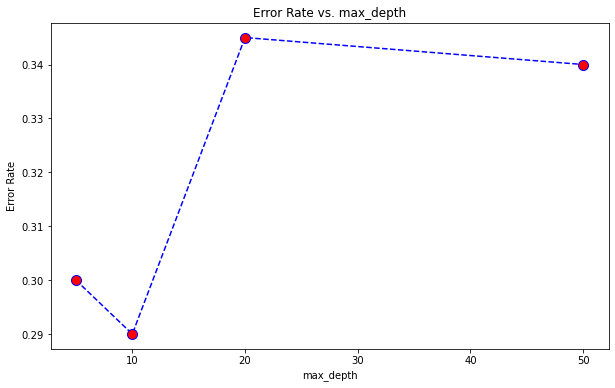

In [35]:
from sklearn.tree import DecisionTreeClassifier
error_rate = []
for i in (3,5,10,20):
 dt = DecisionTreeClassifier(max_depth=i,random_state=42)
 dt.fit(X_train,y_train)
 pred_i = dt.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot((5,10,20,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.show()

In [38]:
df = DecisionTreeClassifier(max_depth=10,random_state=42)
df.fit(X_train,y_train)
y_pred = df.predict(X_test)
accuracy_score(y_test,y_pred),f1_score(y_test,y_pred)

(0.655, 0.7453874538745388)

# RandomForestClassifier

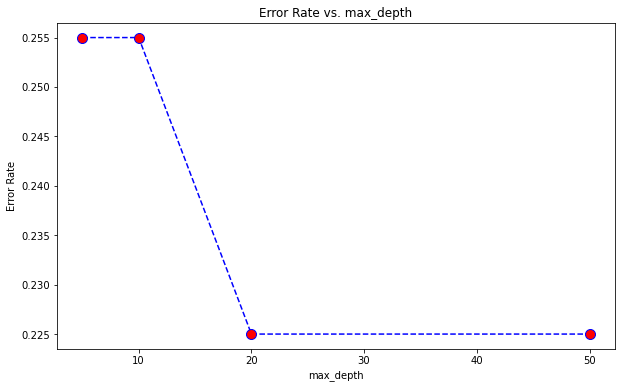

In [40]:
error_rate = []
for i in (5,10,20,50):
 rf = RandomForestClassifier(max_depth=i,random_state=42)
 rf.fit(X_train,y_train)
 pred_i = rf.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot((5,10,20,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.show()

In [43]:
rf = RandomForestClassifier(max_depth=20,random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred),f1_score(y_test,y_pred)

(0.775, 0.8484848484848485)

# Based on accuracy_score Random Forest Classifier is best while KNN is better than Decison Tree here